In [245]:
import pandas as pd
import numpy as np
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
from dateutil.relativedelta import relativedelta,TH
import ta
import pandas_ta as ta
from breeze_connect import BreezeConnect
breeze = BreezeConnect(api_key="f65&396497Vq0161W2d18ngV35%5755@")
import urllib
import matplotlib.pyplot as plt
print("https://api.icicidirect.com/apiuser/login?api_key="+urllib.parse.quote_plus("your_api_key"))
breeze.generate_session(api_secret="5l88!0708cJ04~74!X1V71a90j4~392+",
                        session_token="17800238")

https://api.icicidirect.com/apiuser/login?api_key=your_api_key


In [151]:
n = breeze.get_historical_data_v2(interval="1day",
                            from_date= "2023-01-01T07:00:00.000Z",
                            to_date= "2023-01-19T07:00:00.000Z",
                            stock_code="NIFTY",
                            exchange_code="NSE",
                            product_type="cash")
m =pd.DataFrame(n['Success'])
m.index = m.datetime
m.drop( columns = {'datetime' , 'exchange_code' , 'stock_code' , 'volume' }  , inplace = True)
m.rename( {'datetime' : 'date'} , inplace = True)
m['Expiry'] = 0
for i in range (len(m)) :
    m['Expiry'].iloc[i] = pd.to_datetime(m.index[i]).date() + relativedelta( weekday=TH(+1))
    m['weekday'] = pd.to_datetime(m['Expiry'][i]).weekday()
 
m

,close,high,low,open,Expiry,weekday
datetime,,,,,,
2023-01-02 00:00:00,18197.45,18215.15,18086.50,18131.70,2023-01-05,3
2023-01-03 00:00:00,18232.55,18251.95,18149.80,18163.20,2023-01-05,3
2023-01-04 00:00:00,18042.95,18243.00,18020.60,18230.65,2023-01-05,3
2023-01-05 00:00:00,17992.15,18120.30,17892.60,18101.95,2023-01-05,3
2023-01-06 00:00:00,17859.45,18047.40,17795.55,18008.05,2023-01-12,3
2023-01-09 00:00:00,18101.20,18141.40,17936.15,17952.55,2023-01-12,3
2023-01-10 00:00:00,17914.15,18127.60,17856.00,18121.30,2023-01-12,3
2023-01-11 00:00:00,17895.70,17976.35,17824.35,17924.25,2023-01-12,3
2023-01-12 00:00:00,17858.20,17945.80,17761.65,17920.85,2023-01-12,3


In [226]:
day = 1
start = m.index[day][0:10] + 'T07:00:00.000Z'
end = m.index[day+1][0:10] + 'T07:00:00.000Z'
expiry = m['Expiry'].iloc[day]
strike = '18100'

In [227]:
n = breeze.get_historical_data_v2(interval="5minute",
                            from_date= start,
                            to_date= end,
                            stock_code="NIFTY",
                            exchange_code="NSE",
                            product_type="cash")
m1 =pd.DataFrame(n['Success'])
m1.index = m1.datetime
m1.drop( columns = {'datetime' , 'exchange_code' , 'stock_code' , 'volume' }  , inplace = True)
m1.rename( {'datetime' : 'date'} , inplace = True)
m1

,close,high,low,open
datetime,,,,
2023-01-03 09:05:00,18163.20,18163.20,18163.20,18163.20
2023-01-03 09:15:00,18163.80,18191.70,18153.30,18189.60
2023-01-03 09:20:00,18173.35,18179.75,18155.35,18164.75
2023-01-03 09:25:00,18161.10,18174.60,18149.80,18174.60
2023-01-03 09:30:00,18187.45,18192.90,18161.25,18161.25
...,...,...,...,...
2023-01-03 15:05:00,18231.40,18232.95,18223.15,18228.15
2023-01-03 15:10:00,18240.65,18243.00,18227.95,18232.20
2023-01-03 15:15:00,18233.65,18241.90,18231.30,18239.95


In [228]:
#strike = '18100'
u = breeze.get_historical_data_v2(interval="5minute",
                            from_date= start,
                            to_date= end,
                            stock_code='NIFTY',
                            exchange_code="NFO",
                            product_type="options",
                            expiry_date= expiry,
                            right="call",
                            strike_price= strike)
t =pd.DataFrame(u['Success'])
t.drop( columns = { 'exchange_code' , 'stock_code' , 'volume' , 'expiry_date' , 'product_type' , 'open_interest' , 'right' , 'strike_price' }  , inplace = True)
t.set_index("datetime", inplace = True)
t.reset_index(inplace = True)

u = breeze.get_historical_data_v2(interval="5minute",
                            from_date= start,
                            to_date= end ,
                            stock_code='NIFTY',
                            exchange_code="NFO",
                            product_type="options",
                            expiry_date= expiry,
                            right="put",
                            strike_price= strike)
t1 =pd.DataFrame(u['Success'])
t1.drop( columns = { 'exchange_code' , 'stock_code' , 'volume' , 'expiry_date' , 'product_type' , 'open_interest' , 'right' , 'strike_price' }  , inplace = True)
t1.set_index("datetime", inplace = True)
t1.reset_index(inplace = True)
t


,datetime,close,high,low,open
0,2023-01-03 09:15:00,128.30,149.65,122.65,149.65
1,2023-01-03 09:20:00,134.35,138.00,123.90,128.10
2,2023-01-03 09:25:00,124.15,132.90,117.45,132.90
3,2023-01-03 09:30:00,139.65,142.45,124.95,124.95
4,2023-01-03 09:35:00,140.10,146.60,136.60,139.25
...,...,...,...,...,...
70,2023-01-03 15:05:00,177.65,180.65,168.10,175.10
71,2023-01-03 15:10:00,183.80,186.40,175.35,177.70
72,2023-01-03 15:15:00,178.10,186.15,175.05,183.80
73,2023-01-03 15:20:00,177.30,180.85,176.25,178.00


<AxesSubplot:xlabel='datetime'>

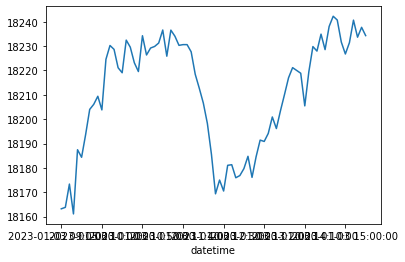

In [229]:
m1.close.plot()

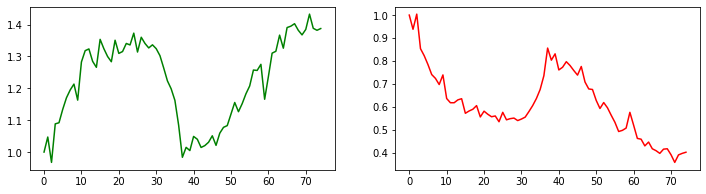

In [230]:
fig, ax = plt.subplots(nrows=1, ncols=2 , figsize=(12, 3))
ax[0].plot(t.close/t.close.iloc[0] , color = 'green')
ax[1].plot(t1.close/t1.close.iloc[0] , color = 'red')
plt.show()

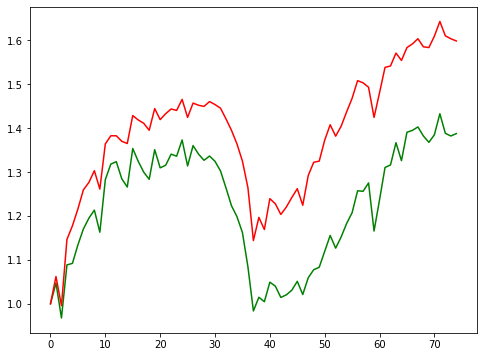

In [231]:
fig, ax2 = plt.subplots( nrows=1, ncols=1, figsize=(8, 6))
ax2.plot(t.close/t.close.iloc[0] , color = 'green')
ax2.plot( 2- t1.close/t1.close.iloc[0] , color = 'red')
plt.show()

<AxesSubplot:>

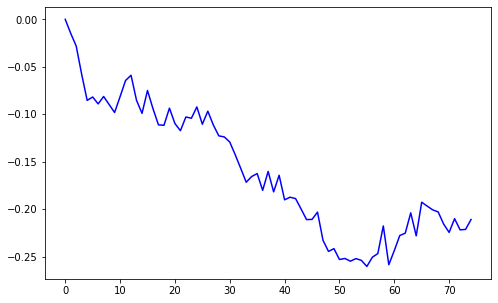

In [232]:
( t.close/t.close.iloc[0] - ( 2-t1.close/t1.close.iloc[0] )  ).plot( color = 'blue' , figsize = (8,5))

<AxesSubplot:>

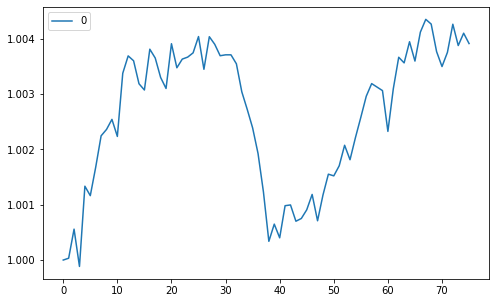

In [233]:
pd.DataFrame(np.array(m1.close)/m1.close.iloc[0]).plot(figsize = (8,5))

In [234]:
(t.close/t.close.iloc[0]) - (m1.close/m1.close.iloc[0])

0                     NaN
1                     NaN
2                     NaN
3                     NaN
4                     NaN
                       ..
2023-01-03 15:05:00   NaN
2023-01-03 15:10:00   NaN
2023-01-03 15:15:00   NaN
2023-01-03 15:20:00   NaN
2023-01-03 15:25:00   NaN
Name: close, Length: 151, dtype: float64

In [235]:
#pd.DataFrame(np.array (m1.close/m1.close.iloc[0])[:75] -np.array(t.close/t.close.iloc[0]) ).plot(color = 'green')

<AxesSubplot:>

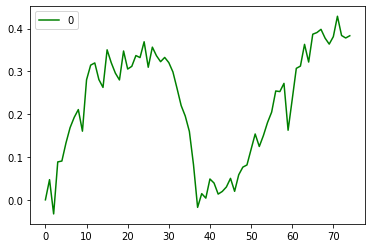

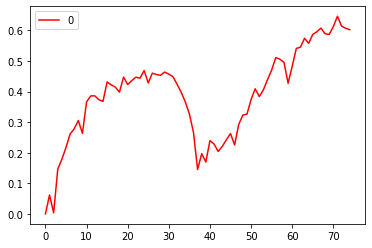

In [236]:
pd.DataFrame(np.array(t.close/t.close.iloc[0]) -np.array (m1.close/m1.close.iloc[0])[:75]).plot(color = 'green')
abs(pd.DataFrame(np.array(t1.close/t1.close.iloc[0]) -np.array (m1.close/m1.close.iloc[0])[:75])).plot(color = 'red')

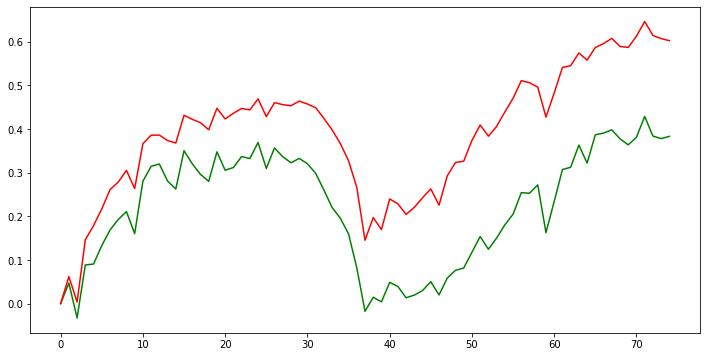

In [237]:
fig, ax1 = plt.subplots(nrows=1, ncols=1 , figsize=(12, 6))
ax1.plot( pd.DataFrame(np.array(t.close/t.close.iloc[0]) -np.array (m1.close/m1.close.iloc[0])[:75]) , color = 'green')
ax1.plot( abs(pd.DataFrame(np.array(t1.close/t1.close.iloc[0]) -np.array (m1.close/m1.close.iloc[0])[:75])) ,color = 'red' )

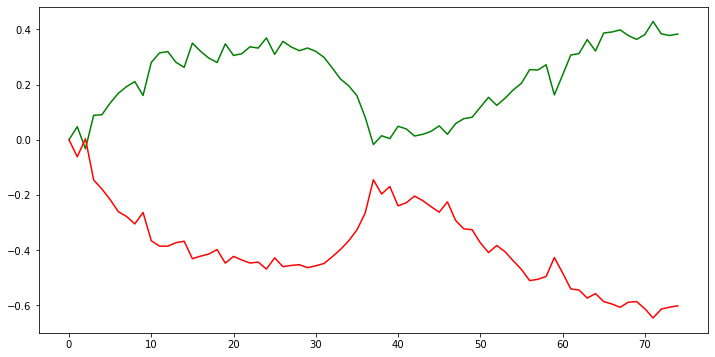

In [238]:
fig, ax1 = plt.subplots(nrows=1, ncols=1 , figsize=(12, 6))
ax1.plot( pd.DataFrame(np.array(t.close/t.close.iloc[0]) -np.array (m1.close/m1.close.iloc[0])[:75]) , color = 'green')
ax1.plot( (pd.DataFrame(np.array(t1.close/t1.close.iloc[0]) -np.array (m1.close/m1.close.iloc[0])[:75])) ,color = 'red' )

In [239]:
np.array(t.close/t.close.iloc[0]) - np.array (m1.close/m1.close.iloc[0])[:75]

array([ 0.        ,  0.04712207, -0.03290489,  0.08858015,  0.09063682,
        0.13289635,  0.16862476,  0.19260951,  0.21081033,  0.16035585,
        0.28030563,  0.31462697,  0.31976911,  0.28088604,  0.26259556,
        0.35039353,  0.32042741,  0.29603524,  0.28001971,  0.34763803,
        0.30551927,  0.31179988,  0.33697423,  0.3322619 ,  0.36920743,
        0.30967671,  0.35664425,  0.33656956,  0.32267759,  0.33262684,
        0.32052926,  0.29870541,  0.26028638,  0.22026289,  0.19563792,
        0.15973058,  0.08225074, -0.0175984 ,  0.01447044,  0.00402687,
        0.04870175,  0.03915754,  0.01342281,  0.01956304,  0.0300357 ,
        0.05014379,  0.01985796,  0.05852594,  0.07637716,  0.08145598,
        0.11772944,  0.15379094,  0.12458065,  0.15017342,  0.18056148,
        0.20474443,  0.25424763,  0.25285001,  0.2720092 ,  0.16256355,
        0.23422882,  0.30711352,  0.31238936,  0.36315373,  0.32185137,
        0.3868931 ,  0.39065689,  0.39821989,  0.37765051,  0.36

<AxesSubplot:>

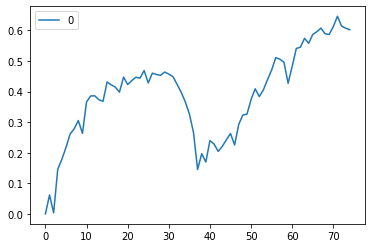

In [240]:
abs(pd.DataFrame(np.array(t1.close/t1.close.iloc[0]) -np.array (m1.close/m1.close.iloc[0])[:75])).plot()

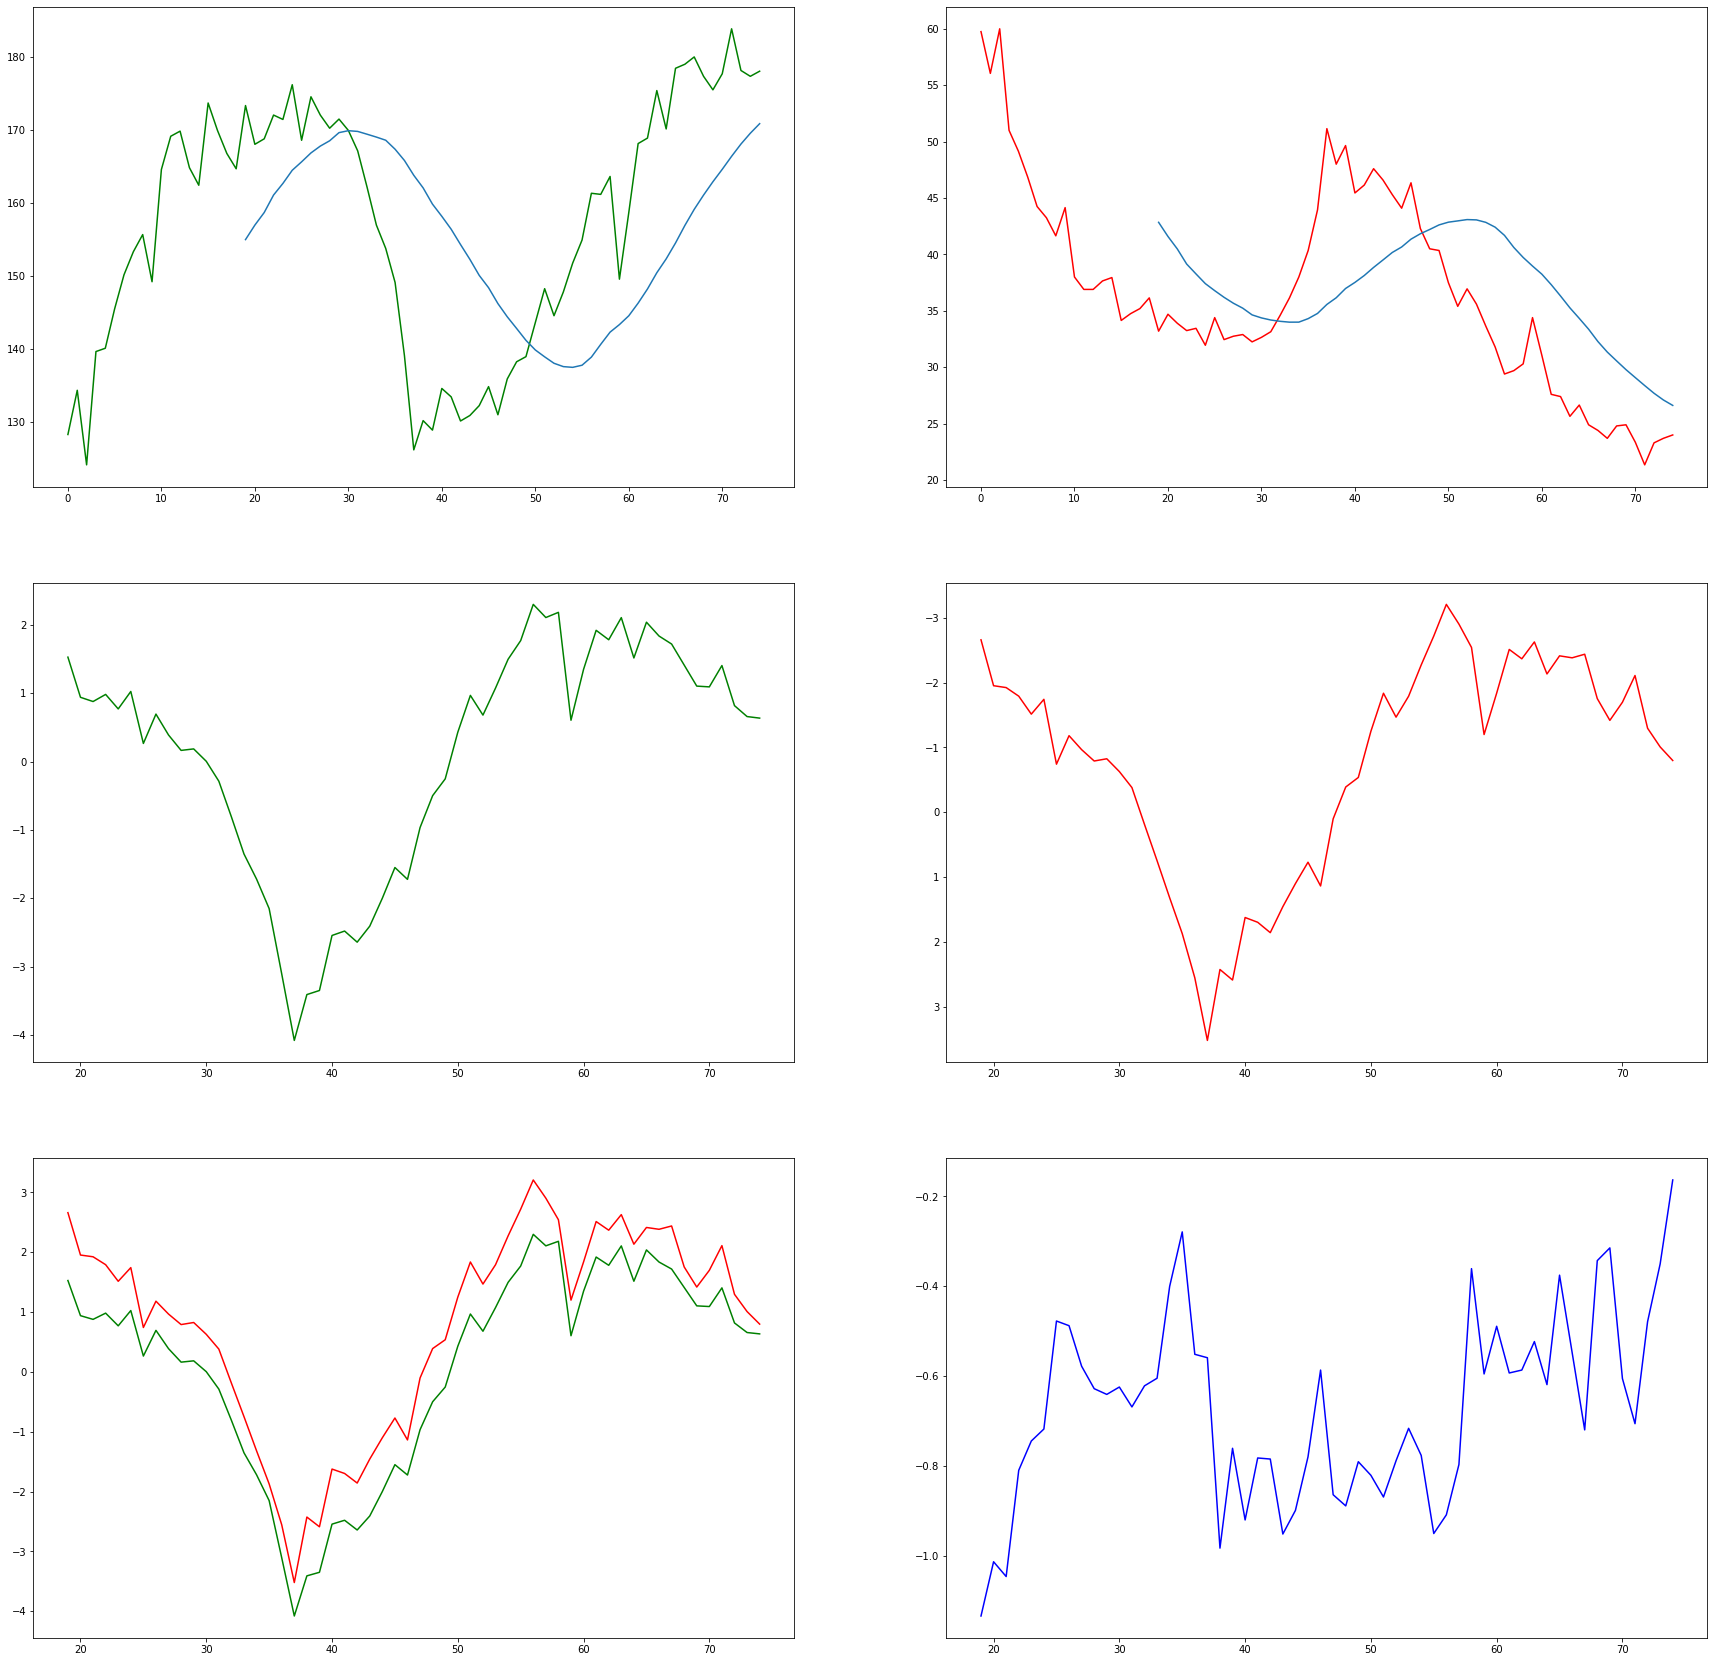

In [241]:
ma_val = 20
atr_val = 20
fig, ax5 = plt.subplots(nrows=3, ncols=2 , figsize=(30, 30))
t['ma'] = t.close.rolling(window =ma_val).mean()
#t['ma'] = np.where(t['ma'].isna() , 0 , t['ma'])
t['atr'] = ta.atr(t.close , t.high , t.low , window = atr_val)
#t['atr'] = np.where(t['atr'].isna() , 0 , t['atr'])
ax5[0][0].plot(t['close'] , color = 'green')
ax5[0][0].plot(t['ma'])

t1['ma'] = t1.close.rolling(window =ma_val).mean()
#t1['ma'] = np.where(t1['ma'].isna() , 0 , t1['ma'])
t1['atr'] = ta.atr(t1.close , t1.high , t1.low , window = atr_val)
#t1['atr'] = np.where(t1['atr'].isna() , 0 , t1['atr'])
ax5[0][1].plot(t1['close'] , color = 'red')
ax5[0][1].plot(t1['ma'])

ax5[1][0].plot( (t.close - t.ma)/ t.atr , color = 'green' )
ax5[1][1].plot( (t1.close - t1.ma)/ t1.atr  , color = 'red')
ax5[1][1].invert_yaxis()

ax5[2][0].plot( -( (t1.close - t1.ma)/ t1.atr )  , color = 'red')
ax5[2][0].plot( (t.close - t.ma)/ t.atr , color = 'green' )

ax5[2][1].plot(   ((t.close - t.ma)/ t.atr) - (-( (t1.close - t1.ma)/ t1.atr )) , color = 'blue'   )

In [242]:
for i in range (ma_val) :
    t['ma'].iloc[i] = t.close.iloc[i] - 0.5*( pd.DataFrame ( ((t.close - t.ma)/ t.atr) - (-( (t1.close - t1.ma)/ t1.atr )) ).iloc[20][0] )
    t['atr'].iloc[i] = 1
    
for i in range (ma_val) :
    t1['ma'].iloc[i] = t1.close.iloc[i] - 0.5*( pd.DataFrame ( ((t.close - t.ma)/ t.atr) - (-( (t1.close - t1.ma)/ t1.atr )) ).iloc[20][0] )
    t1['atr'].iloc[i] = 1
    
t 

,datetime,close,high,low,open,ma,atr
0,2023-01-03 09:15:00,128.30,149.65,122.65,149.65,128.806854,1.000000
1,2023-01-03 09:20:00,134.35,138.00,123.90,128.10,134.856854,1.000000
2,2023-01-03 09:25:00,124.15,132.90,117.45,132.90,124.656854,1.000000
3,2023-01-03 09:30:00,139.65,142.45,124.95,124.95,140.156854,1.000000
4,2023-01-03 09:35:00,140.10,146.60,136.60,139.25,140.606854,1.000000
...,...,...,...,...,...,...,...
70,2023-01-03 15:05:00,177.65,180.65,168.10,175.10,164.580000,11.959807
71,2023-01-03 15:10:00,183.80,186.40,175.35,177.70,166.357500,12.415039
72,2023-01-03 15:15:00,178.10,186.15,175.05,183.80,168.035000,12.299121
73,2023-01-03 15:20:00,177.30,180.85,176.25,178.00,169.510000,11.832812


<AxesSubplot:>

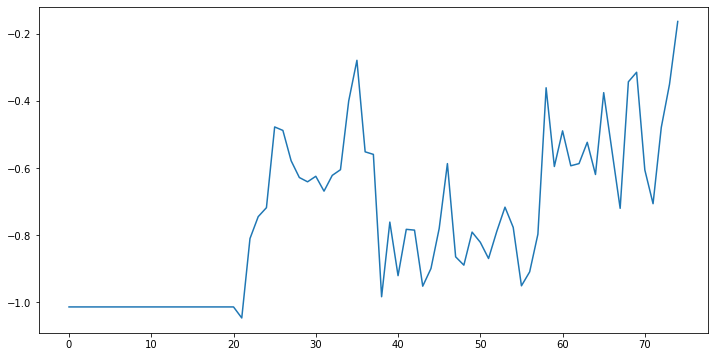

In [243]:
#abs(pd.DataFrame(np.array(t1.close/t1.close.iloc[0]) -np.array (m1.close/m1.close.iloc[0])[:75])).plot(figsize = (12,6))
#pd.DataFrame(np.array(m1.close)/m1.close.iloc[0]).plot(figsize = (12,6))
(  ((t.close - t.ma)/ t.atr) - (-( (t1.close - t1.ma)/ t1.atr )) ).plot(figsize = (12,6))

<AxesSubplot:>

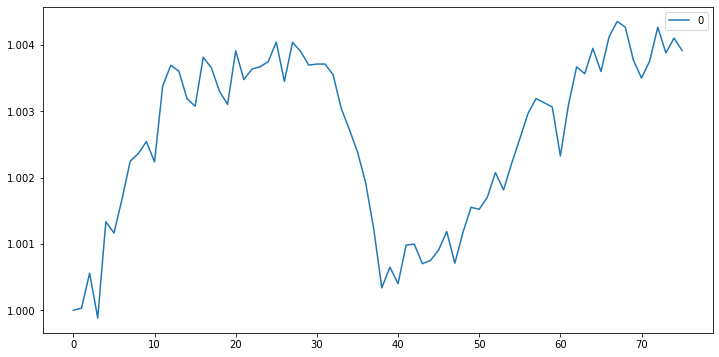

In [244]:
pd.DataFrame(np.array(m1.close)/m1.close.iloc[0]).plot(figsize = (12,6))

In [203]:
pd.DataFrame ( ((t.close - t.ma)/ t.atr) - (-( (t1.close - t1.ma)/ t1.atr )) ).iloc[20][0]

-0.7229739269622147

In [204]:
n = breeze.get_historical_data_v2(interval="1day",
                            from_date= "2023-01-01T07:00:00.000Z",
                            to_date= "2023-07-19T07:00:00.000Z",
                            stock_code="NIFTY",
                            exchange_code="NSE",
                            product_type="cash")
mm =pd.DataFrame(n['Success'])
mm.index = mm.datetime
mm.drop( columns = {'datetime' , 'exchange_code' , 'stock_code' , 'volume' }  , inplace = True)
mm.rename( {'datetime' : 'date'} , inplace = True)
mm['Expiry'] = 0
for i in range (len(mm)) :
    mm['Expiry'].iloc[i] = pd.to_datetime(mm.index[i]).date() + relativedelta( weekday=TH(+1))
    mm['weekday'] = pd.to_datetime(mm['Expiry'][i]).weekday()
mm['rsi'] = ta.rsi( mm.close , timeperoid = 21)
mm['ema10'] = mm.close.ewm(com=9).mean()
mm.dropna(inplace = True)
mm


,close,high,low,open,Expiry,weekday,rsi,ema10
datetime,,,,,,,,
2023-01-20 00:00:00,18027.65,18145.45,18016.20,18115.60,2023-01-26,3,47.107372,18018.238829
2023-01-23 00:00:00,18118.55,18162.60,18063.45,18118.45,2023-01-26,3,52.242364,18030.551511
2023-01-24 00:00:00,18118.30,18201.25,18078.65,18183.95,2023-01-26,3,52.227346,18041.082659
2023-01-25 00:00:00,17891.95,18100.60,17846.15,18093.35,2023-01-26,3,40.793410,18023.535686
2023-01-27 00:00:00,17604.35,17884.75,17493.55,17877.20,2023-02-02,3,31.390054,17975.070141
...,...,...,...,...,...,...,...,...
2023-07-13 00:00:00,19443.20,19566.45,19386.60,19495.20,2023-07-13,3,69.199783,19151.514558
2023-07-14 00:00:00,19587.35,19594.55,19434.15,19493.45,2023-07-20,3,72.791101,19195.098142
2023-07-17 00:00:00,19719.10,19731.55,19563.70,19612.15,2023-07-20,3,75.592321,19247.498371


In [205]:
u = 0
w = 0
v = 0
ind = 0
eema = []
cclose = []
for i in range (1 ,len(mm) ) :
    u = u + 1
    if u == 3 :
        print(i-2 , i-1 , i)
        rr = np.array( mm.ema10.iloc[i-3 : i + 1].pct_change() )[1:].sum()
        print(rr)
        #if len(rr) != 0 :
        eema.append(rr)
        #    for fc in range (0,3) :
        #        eema.append(rr[fc])   
        u = 0
        v = 1
        
    if v == 1 :
        ind = ind + 1
        if ind > 2 :
            print( i -1 , i)
            rr1 = np.array( mm.close.iloc[i-2 : i +1].pct_change() )[1:].sum()
            print(rr1)
            #if len(rr1) != 0 :
            cclose.append(rr1)
            #    for fc1 in range (0 ,2) :           
            #        cclose.append(  rr1[fc1] )
            v = 0
            w = 0
            ind = 0
        
    
eema

1 2 3
0.00029480594040776076
4 5
-0.013540803296493875
4 5 6
-0.006480801899020672
7 8
-0.0028524008197290396
7 8 9
-0.003560381377607058
10 11
-0.006200570642221126
10 11 12
-0.000935503672884419
13 14
-0.0010662609666515221
13 14 15
5.9695245512525474e-05
16 17
0.014509821610341422
16 17 18
0.0025441054355819226
19 20
-0.009321783060589062
19 20 21
1.4951920321193413e-05
22 23
-0.01786636794041674
22 23 24
-0.005597922316759818
25 26
-0.008505517585918443
25 26 27
-0.005843160471376563
28 29
0.00786149036560535
28 29 30
-0.0017354359086511062
31 32
-0.007717289744885725
31 32 33
-0.0010272559678974336
34 35
-0.02018123574480024
34 35 36
-0.008563375761450054
37 38
0.008813943444281325
37 38 39
-0.006630087444255861
40 41
0.008179716694038941
40 41 42
-0.003923212991167824
43 44
-0.006137199974521224
43 44 45
-0.005272491328188189
46 47
0.023457340323247422
46 47 48
0.0016503583612541561
49 50
0.011604993754409376
49 50 51
0.005807772585827431
52 53
0.011597118557635122
52 53 54
0.007

[0.00029480594040776076,
 -0.006480801899020672,
 -0.003560381377607058,
 -0.000935503672884419,
 5.9695245512525474e-05,
 0.0025441054355819226,
 1.4951920321193413e-05,
 -0.005597922316759818,
 -0.005843160471376563,
 -0.0017354359086511062,
 -0.0010272559678974336,
 -0.008563375761450054,
 -0.006630087444255861,
 -0.003923212991167824,
 -0.005272491328188189,
 0.0016503583612541561,
 0.005807772585827431,
 0.00731636435887828,
 0.0031616243141496803,
 0.002494042022119114,
 0.004464919483045504,
 0.007078902564469081,
 0.006702203929465966,
 0.00634763275396355,
 0.005055982029033457,
 0.0015216286839281334,
 0.003016559245067052,
 0.004845944276432368,
 0.004379388508641391,
 0.003774683836833992,
 0.003600415922066169,
 0.0034451319141572956,
 0.0033304684119548345,
 0.0034007185490232406,
 0.0011587017616123685,
 0.007330046390414902,
 0.008918550469549702,
 0.005766435912562207,
 0.005517054336199312,
 0.008194815284920276]

In [206]:
eema =np.array(eema)/np.array(eema)[0]
cclose = np.array(cclose)/ np.array(cclose)[0]
eema = eema[: -1]
print(len(eema) , len(cclose)  )


39 39


In [179]:
ret = mm.close.pct_change().dropna()
ret_low = mm.low.pct_change().dropna()
ret_rsi = mm.rsi.pct_change().dropna()
ret_ema = mm.ema10.pct_change().dropna()

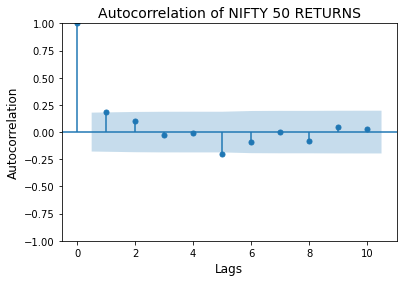

In [27]:
from statsmodels.graphics.tsaplots import plot_acf
#from statsmodels.graphics.tsaplots import plot_ccf
from statsmodels.graphics.tsaplots import plot_pacf
plot_acf(ret , lags=10)
plt.xlabel('Lags', fontsize=12)
plt.ylabel('Autocorrelation', fontsize=12)
plt.title('Autocorrelation of NIFTY 50 RETURNS', fontsize=14)
plt.show()

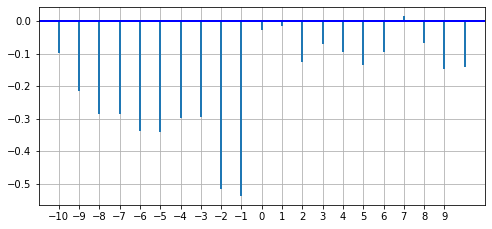

In [28]:
fig = plt.figure(figsize = (8,8))
ax1 = fig.add_subplot(211)

ax1.xcorr(cclose, eema, usevlines=True,
          maxlags=10, normed=True,
          lw=2)

ax1.grid(True)
ax1.axhline(0, color='blue', lw=2)
plt.xticks(np.arange(-10, 10, 1))
plt.show()

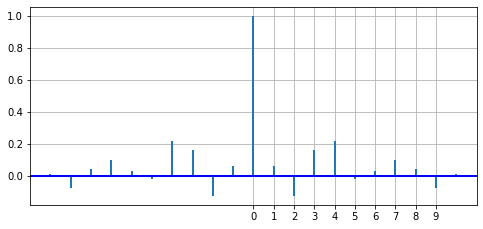

In [29]:
fig = plt.figure(figsize = (8,8))
ax2 = fig.add_subplot(211)
ax2.acorr(cclose, usevlines=True, normed=True, maxlags=10, lw=2)
ax2.grid(True)
ax2.axhline(0, color='blue', lw=2)
plt.xticks(np.arange(0, 10, 1))
plt.show()


In [30]:
a , b = 5,6
b

6

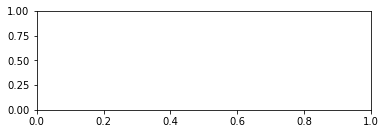

In [31]:
fig = plt.figure()
ax1 = fig.add_subplot(211)